# Data storytelling

#### Data set
https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset?select=CompleteDataset.csv

#### Intended Audience: 
                        Data Scientists who also enjoy watching Soccer

#### Question to be answered: 
                        1. Which clubs have the most valuable players, top 10?
                        2. Which clubs pay the most amount of wage to its players, top 10?
                        3. Who are the most valuable soccer players, top 10?
                        4. Who are the highest paid soccer players, top 10?
                        5. Between Christian Ronaldo and Leo Messi, who is the best player?
                       

#### Import the necessary libraries

In [1]:
# Import necessary libraries and load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import boto3

## Source and load the data

In [2]:
client = boto3.client('s3')
path = 's3://classdataset/fifa.csv'
df = pd.read_csv(path, low_memory=False)

In [3]:
df.shape

(17981, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [5]:
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data wrangling 

In [6]:
df = df.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo'], axis=1)

In [7]:
df = df.dropna()

In [8]:
# Clean-up the column "Value" 
df['Value_Euros'] = df['Value'].str.replace('€', '').str.replace(r'[KM]+$', '', regex=True).astype('float')*\
df['Value'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K', 'M'], [10**3, 10**6]).astype('int')

In [9]:
# Clean-up the column "Wage" 
df['Wage_Euros'] = df['Wage'].str.replace('€', '').str.replace(r'[KM]+$', '', regex=True).astype('float')*\
df['Wage'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K', 'M'], [10**3, 10**6]).astype('int')

In [10]:
# Delete the columns "Value" and "Wage"
df = df.drop(['Value', 'Wage'], axis=1)

In [11]:
# Let's extract the subset of the data set as needed to answer our question
sub_df = df[['Name', 'Age', 'Nationality', 'Club', 'Value_Euros', 'Wage_Euros', 'Heading accuracy', 'Dribbling', 'Vision', \
             'Long passing', 'Aggression', 'Composure', 'Agility']]

In [12]:
sub_df['Heading accuracy'].unique()

array(['88', '71', '62', '77', '85', '57', '54', '86', '91', '53', '70',
       '55', '68', '84', '80', '58', '79', '92', '89', '82', '51', '73',
       '52', '81', '74', '83', '75', '87', '76', '47', '49', '59', '90',
       '35', '78', '41', '56', '72', '63', '60', '50', '65', '61', '29',
       '36', '94', '43', '42', '45', '69', '93', '34', '67', '64', '32',
       '46', '48', '38', '40', '37', '66', '85-1', '44', '73+1', '39',
       '76+2', '74+1', '72+3', '24', '33', '28', '23', '30', '27', '78+1',
       '78-1', '25', '22', '21', '75+2', '75-1', '65+2', '68-7', '42-7',
       '31', '69+2', '20', '70+2', '56+2', '46+8', '74+2', '64+4', '72-2',
       '72+2', '18', '16', '60+2', '64-1', '55+7', '59+2', '68-4', '43+3',
       '69-1', '26', '74-2', '61+1', '61+2', '63+4', '57+5', '71-1',
       '59-5', '65-1', '59-1', '62-1', '72+1', '62+3', '64-3', '17',
       '63-3', '56-6', '53+6', '64+1', '60+4', '62+4', '65+1', '60-5',
       '50-10', '54+3', '48-2', '69-3', '63+1', '64+2', '

In [13]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15746 entries, 0 to 17980
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              15746 non-null  object 
 1   Age               15746 non-null  int64  
 2   Nationality       15746 non-null  object 
 3   Club              15746 non-null  object 
 4   Value_Euros       15746 non-null  float64
 5   Wage_Euros        15746 non-null  float64
 6   Heading accuracy  15746 non-null  object 
 7   Dribbling         15746 non-null  object 
 8   Vision            15746 non-null  object 
 9   Long passing      15746 non-null  object 
 10  Aggression        15746 non-null  object 
 11  Composure         15746 non-null  object 
 12  Agility           15746 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.7+ MB


As seen from above, the columns representing players attributes such as Heading accuracy, Dribbling etc have values that are not numerical and contain plus/minus signs. So we need to clean them up properly and convert the values into numerical value. That what I will do in the next step.

In [14]:
import warnings
warnings.filterwarnings("ignore")
names = ['Heading accuracy', 'Dribbling', 'Vision', 'Long passing', 'Aggression', 'Composure', 'Agility']
for name in names:
    sub_df[name] = sub_df[name].str.split(r"\+|-").str.get(0).astype('int')+sub_df[name].str.split(r"\+|-").str.get(1).\
    fillna(0).astype('int')

## Exploratory Data Analysis

I will do a quick heatmap to look at the correlations between different attributes in the data set.

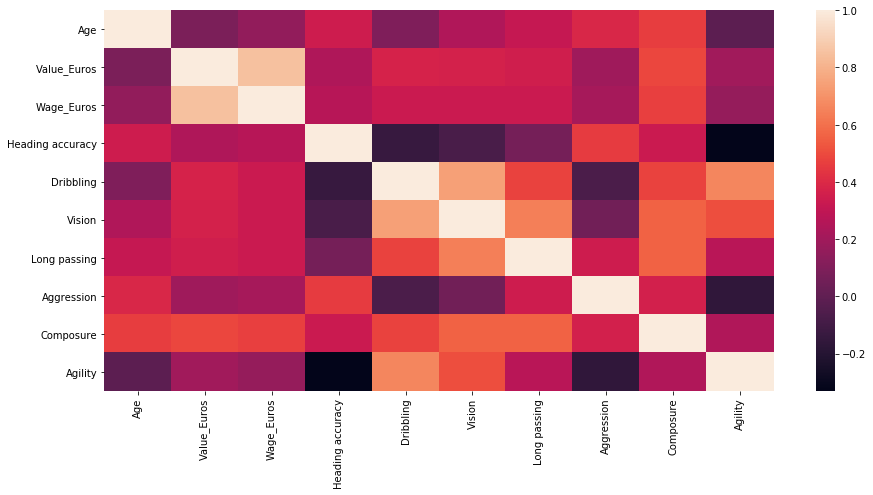

In [15]:
_ = plt.figure(figsize=(15,7))
_ = sns.heatmap(sub_df.corr())
plt.show()

## Which clubs have the most valuable players, top 10?

In [16]:
# The average value of the players ($ million) in each club - top 10
pd.DataFrame(round(sub_df.groupby(['Club']).mean().Value_Euros.nlargest(10)/1000000)).reset_index().rename(columns={'Club':\
                                                    'Name of the Club', 'Value_Euros': 'Value in Millions of Euros'})

,Name of the Club,Value in Millions of Euros
0,Real Madrid CF,34.0
1,FC Barcelona,31.0
2,FC Bayern Munich,30.0
3,Juventus,26.0
4,Paris Saint-Germain,24.0
5,Chelsea,21.0
6,Manchester City,18.0
7,Manchester United,18.0
8,Tottenham Hotspur,17.0
9,Atlético Madrid,17.0


## Which clubs pay the most amount of wage to its players, top 10?

In [17]:
# The average wage of the players ($ thousands) in each club - top 10
pd.DataFrame(round(sub_df.groupby(['Club']).mean().Wage_Euros.nlargest(10)/1000)).reset_index().rename(columns={'Club':\
                                                    'Name of the Club', 'Wage_Euros': 'Wage in Thousands of Euros'})

,Name of the Club,Wage in Thousands of Euros
0,FC Barcelona,203.0
1,Real Madrid CF,194.0
2,FC Bayern Munich,129.0
3,Juventus,127.0
4,Chelsea,110.0
5,Manchester United,107.0
6,Manchester City,98.0
7,Arsenal,91.0
8,Liverpool,86.0
9,Paris Saint-Germain,83.0


## Who are the most valuable soccer players, top 10?

In [18]:
# The most valuable soccer players in millions
pd.DataFrame(sub_df.groupby(['Name']).mean().Value_Euros.nlargest(10)/1000000).reset_index().rename(columns={'Name':\
                                                'Name of the Player', 'Value_Euros': 'Value in Millions of Euros'})

,Name of the Player,Value in Millions of Euros
0,Neymar,123.0
1,L. Messi,105.0
2,Cristiano Ronaldo,95.5
3,R. Lewandowski,92.0
4,E. Hazard,90.5
5,K. De Bruyne,83.0
6,P. Dybala,79.0
7,T. Kroos,79.0
8,G. Higuaín,77.0
9,A. Griezmann,75.0


## Who are the highest paid soccer players, top 10?

In [19]:
# The highest paid soccer players in thousands
pd.DataFrame(sub_df.groupby(['Name']).mean().Wage_Euros.nlargest(10)/1000).reset_index().rename(columns={'Name':\
                                                'Name of the Player', 'Wage_Euros': 'Wage in Thousands of Euros'})

,Name of the Player,Wage in Thousands of Euros
0,Cristiano Ronaldo,565.0
1,L. Messi,565.0
2,G. Bale,370.0
3,R. Lewandowski,355.0
4,L. Modrić,340.0
5,T. Kroos,340.0
6,S. Agüero,325.0
7,Sergio Ramos,310.0
8,E. Hazard,295.0
9,K. Benzema,295.0


## Between Christian Ronaldo and Leo Messi, who is the best player?

The players are compared against each other based on the following attributes:

__Heading accuracy__: Comes under defensive attributes but also applies in an attacking sense. Heading accuracy increases the likelihood of winning a header, as well as getting a header on target (whether a pass or shot).

__Dribbling__: Simply, this measures how well a player moves with the ball. A good dribbler will keep the ball closer to his feet at all times, making him less likely to be dispossessed. A poor dribbler tends to show far too much of the ball to his opponent and provide many chances to tackle him.

__Vision__: Vision is perhaps a misleading name for this attribute, but it relates to a players awareness of his teammates. Good players are described as having a radar or seeing the whole picture, this is what this stat represents. A higher vision stat gives a player a much larger radius of what he’s aware of. This will result in successful passes, even over longer distances. Players with poor vision are prone to sending the ball out of play or passing the ball to an opponent.

__Long passing__: A long pass is most easily defined by thinking about the buttons on your controller. Long passes are always aerial, even the more drilled ones. A higher long pass stat means the passes will be more accurate and even travel toward their target faster.

__Composure__: This is one of the most misunderstood attributes in FIFA. Most people have assumed for years that it affects a players nerve during big games or when taking penalties. However, it actually controls how composed a player is when under pressure from an opponent. A player with a low composure stat will be prone to errors even when an opponent is a few feet away. Players with high composure will be more successful with shots and passes, even when being closed down by an opponent.

__Agility__: This stat is a little harder than most to understand. It tends to affect speed of ball control while running or changing direction, so high agility is key for good dribblers. A high enough agility stat will also give players the ability to clear the ball acrobatically or even shoot in an acrobatic fashion (think overhead kicks).

For more information, check out the link here https://fifacareermodetips.com/attributes-mega-guide/

In [20]:
# Christian Ronaldo
ronaldo = sub_df[sub_df['Name']=='Cristiano Ronaldo'][['Heading accuracy', 'Dribbling', 'Vision', \
                                                       'Long passing', 'Composure', 'Agility']]
ronaldo = ronaldo.T.reset_index().rename(columns={'index':'attribute', 0: 'value'})

In [27]:
import plotly.express as px
fig = px.line_polar(ronaldo, r='value', theta='attribute', line_close=True)
fig.show()

In [22]:
# Leo Messi
messi = sub_df[sub_df['Name']=='L. Messi'][['Heading accuracy', 'Dribbling', 'Vision', \
                                            'Long passing', 'Composure', 'Agility']]
messi = messi.T.reset_index().rename(columns={'index':'attribute', 1: 'value'})

In [26]:
fig = px.line_polar(messi, r='value', theta='attribute', line_close=True)
fig.show()

In [25]:
# Plot charts from both Ronald and Messi on top of each other to compare
import plotly.graph_objects as go

fig = go.FigureWidget()

fig.add_trace(go.Scatterpolar( r=messi['value'], theta=messi['attribute'], fill='toself', name='Messi'))
fig.add_trace(go.Scatterpolar( r=ronaldo['value'], theta=ronaldo['attribute'], fill='toself', name='Ronaldo'))

fig.update_layout(
  polar=dict(radialaxis=dict( visible=True, range=[65, 100])), showlegend=False)

fig.show()

According to the above spider chart, Christian Ronaldo has a better Heading accuracy than Messi. However, Messi performs better than Ronaldo in all other attributes. Overall, Messi moves better with the ball, has greater awareness of his teammates, has better long pass, performs better when under pressure from the opponent hence less prone to errors when an opponent is a few feet awat, and higher control over the speed of ball while running or changing direction. Overall, as per the data, Messi appears to be a better soccer player than his opponent Christian Ronaldo probably that is the reason Messi is valued higher than Ronaldo. 

## Next Steps:

This is not a comprehensive list of analytics that could be explored. This is a pretty rich data set that could be further explored for more interesting insights. Therefore I suggest the following as the next steps for myself and the fellow Data Scientists who are also interested in soccer:

* What are the common attributes of the highest valued soccer players?

* Which players do you recommend next for the Clubs to consider investing?

* How many goals do you predict Leo Messi will score in the next match?

* Which players will be in the highest valued players' list in the after 5 years?

* Which attributes contribute the most to the overall performance of the player?